<a href="https://colab.research.google.com/github/gtsu070701/bigdata_license/blob/main/Copy_of_bigdata_%EC%98%88%EC%8B%9C%EB%AC%B8%EC%A0%9C_solution_20240606.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **빅데이터 분석 기사 실기 10회 대비 - 답안 제출 및 채점 기준**

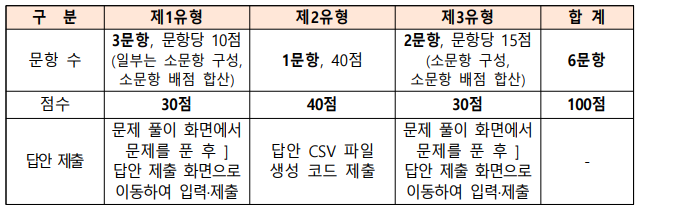

### **빅데이터 분석 기사 실기 10회 대비 예시문제 풀이**

### 작업1유형 예시문제
#### 제공 데이터 (employee_performance.csv)

회사의 직원 연봉과 근속연수 등에 관한 자료입니다.

#### 데이터 컬럼 설명:
- 직원ID: 고유 식별자  
- 부서: 소속 부서  
- 연봉: 연간 급여  
- 근속연수: 총 근무기간  
- 성과등급: 성과 등급 [A, B, C]  
- 교육참여횟수: 회사 교육에 참여한 횟수  
- 고객만족도: 담당 업무에 대한 고객의 만족도  

---

####  수행 순서

1. **고객만족도가 없는 직원**의 경우, 평균 고객만족도로 결측치를 채운다.
2. **근속연수가 없는 직원**의 경우, 해당 직원을 삭제한다.
3. 직원의 **고객만족도의 4분위 중 3사분위수 값**을 계산한다.
4. **부서별로 평균 연봉을 구하고**,  
   두 번째로 평균연봉이 높은 부서의 평균연봉을 계산한다.

---

#### 제출 항목

① 수행순서 3)에서 계산한 값을 입력하세요.  
☞ **[제출 형식]** 버림하여 정수(integer)로 작성

② 수행순서 4)에서 계산한 값을 입력하세요.  
☞ **[제출 형식]** 버림하여 정수(integer)로 작성


In [ ]:
# 데이터 이해
import pandas as pd
path = 'https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/'
df = pd.read_csv(path + 'employee_performance.csv')
print(df.shape)
df.head(3)

(1000, 7)


,직원ID,부서,연봉,근속연수,성과등급,교육참여횟수,고객만족도
0,E1,Marketing,57285,4.0,A,14,8.0
1,E2,Finance,31605,15.0,C,5,4.0
2,E3,IT,101158,10.0,A,19,4.0


In [ ]:
# 여기에 풀이해 주세요.
import pandas as pd
path = 'https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/'
df = pd.read_csv(path + 'employee_performance.csv')
# 1) 고객만족도가 없는 직원의 경우, 평균 고객만족도로 결측치를 채운다.
# 2) 근속연수가 없는 직원의 경우, 해당 직원을 삭제한다.
# 3) 직원의 고객만족도의 4분위 중 3사분위수 값을 계산한다.
# 4) 부서별로 평균 연봉을 구하고,
# 두 번째로 평균연봉이 높은 부서의 평균연봉을 계산한다.
#print(df.isna().sum())
df['고객만족도'] = df['고객만족도'].fillna(df['고객만족도'].mean())
df = df.dropna()
#df = df.dropna(subset=['근속연수'])
Q3 = df['고객만족도'].quantile(0.75)
print(int(Q3))  # 8
s = df.groupby('부서')['연봉'].mean().sort_values(ascending=False).iloc[1]
print(int(s))  # 74690

8
74690


### 작업2유형 예시문제
제공된 학습용 데이터(customer_train.csv)는 백화점 고객의 1년간 상품 구매 기록입니다.  
이 데이터를 활용하여 **총구매액**을 예측하는 모델을 학습하고,  
이를 평가용 데이터(customer_test.csv)에 적용해 **총구매액을 예측**합니다.

- 예측 성능 평가지표: **RMSE (Root Mean Squared Error)**

---

#### 제출 형식

- ㄱ. 파일명: `result.csv` (파일명에 디렉토리.폴더 지정불가)
- ㄴ. 예측 총 구매금액 칼럼명: `pred`
- ㄷ. 제출 칼럼 개수: pred 칼럼 1개
- ㄹ. 평가용 데이터 개수와 예측 결과 데이터 개수 일치 : 2,482개

---

#### 제공 데이터

1. **customer_train.csv**: 학습 데이터, 3,500개
2. **customer_test.csv**: 테스트 데이터, 2,482개  
   ※ 테스트 데이터에는 총구매액 칼럼 미제공

---

#### 데이터 설명

| 컬럼명          | 설명                                |
|------------------|--------------------------------------|
| 회원ID           | 회원 고유 번호                       |
| 총구매액         | 총 구매금액 (십만원 단위)           |
| 최대구매액       | 구매건당 최대 구매금액 (십만원 단위) |
| 환불금액         | 환불 금액 (십만원 단위)             |
| 주구매상품       | 주로 구매한 품목 (42개 범주)         |
| 주구매지점       | 주로 구매한 지정점 (24개 범주)       |
| 방문일수         | 고객이 방문한 일수 (년 단위)        |
| 방문당구매건수   | 총구매건수 / 방문일수                |
| 주말방문비율     | 주말에 방문한 비율                   |
| 구매주기         | 구매 주기 (일 단위)                  |

---
#### CSV 파일 형식 및 확인 방법

- CSV 파일명: result.csv
- 예측 총 구매금액 칼럼명: pred

| 칼럼명 | 칼럼 설명 |
|--------|------------|
| pred   | 예측 총 구매금액 |

---

#### 제출 CSV 파일 형식 예시

        pred
        8790.6061268
        14.748660
        215.6055114
        761.88
        ……
        458.1171402

In [ ]:
# 여기에 문제를 풀이해 주세요.
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_absolute_error as mae

def get_scores(model, x_train, x_test, y_train, y_test):
    A = model.score(x_train, y_train)
    B = model.score(x_test, y_test)
    y_pred1 = abs(model.predict(x_train))
    y_pred2 = abs(model.predict(x_test))
    C = mse(y_train, y_pred1) ** 0.5  # rmse
    D = mse(y_test, y_pred2) ** 0.5   # rmse
    return f'r2: {A:.4f}, {B:.4f} RMSE: {C:.4f}, {D:.4f}'

# [1] 파일 가져오기 (2개, XX_train.csv, XX_test.csv)
path = 'https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/'
XY = pd.read_csv(path + 'customer02_train.csv')
X_submission = pd.read_csv(path + 'customer02_test.csv')
print(XY.shape, X_submission.shape)
# print(XY.head(3))
# print(X_submission.head(3))
X = XY.drop(columns='총구매액')
Y = XY['총구매액']
#print(X.shape, Y.shape)

# [2] 데이터 탐색 (XY.info(), X_submission.info()) 결측치, 컬럼 dtype
#XY.info()  # 환불금액 - 결측치, 주구매상품, 주구매지점 - object
#print(XY.select_dtypes(include=['object']).nunique())
#print(XY.nunique())

# [3] 데이터 전처리
# [3-1] X, X_submission -> X_all
# [3-2] X_all : 컬럼제거, 컬럼 dtype 변경(컬럼의 값을 대체), Encoding(범주형->수치형)
# [3-3] X_all : Scaling (안함, MinMaxScaler, StandardScaler, ...)
# [3-4] X_all -> X, X_submission 분리

X_all = pd.concat([X, X_submission])
# 컬럼제거 : 회원ID
# Encoding : obj_columns -> LabelEncoding
X_all = X_all.drop(columns=['회원ID'])
X_all['환불금액'] = X_all['환불금액'].fillna(0)
X_all['주구매상품'] = LabelEncoder().fit_transform(X_all['주구매상품'])
X_all['주구매지점'] = LabelEncoder().fit_transform(X_all['주구매지점'])

# X_all = pd.get_dummies(X_all, drop_first=True, dtype='int')

if True:
    temp = MinMaxScaler().fit_transform(X_all)
    X_all = pd.DataFrame(temp, columns=X_all.columns)

#print(type(temp))  # <class 'numpy.ndarray'>
#print(type(X_all))

#X_all.info()

X = X_all.iloc[:len(X), :]
X_submission = X_all.iloc[len(X):, :]
#print(X.shape, X_submission.shape)  # (3500, 8) (2482, 8)

# [4] 모델링
# [4-1] train_test_split : (X, Y) -> (x_train, x_test, y_train, y_test)
# [4-2] 모델객체 생성, 학습 (x_train, y_train)
# [4-3] 평가 (x_train, y_train), (x_test, y_test)

temp = train_test_split(X, Y, test_size=0.2, random_state=1234)
x_train, x_test, y_train, y_test = temp
print([x.shape for x in temp])  # [(2800, 9), (700, 9), (2800,), (700,)]

# model1 = LinearRegression().fit(x_train, y_train)
# print(get_scores(model1, x_train, x_test, y_train, y_test))
# r2: 0.6808, 0.6880 RMSE: 93609635.3425, 85804766.7420
# r2: 0.7056, 0.6991 RMSE: 89704111.9655, 84029470.9589 - One Hot Encoding

# model2 = DecisionTreeRegressor(random_state=123).fit(x_train, y_train)
# print(get_scores(model2, x_train, x_test, y_train, y_test))
# print(model2.get_depth())
# r2: 1.0000, 0.4253 RMSE: 2109295.5948, 116554791.0293

# for d in range(3, 15):
#     model2 = DecisionTreeRegressor(max_depth=d, random_state=123).fit(x_train, y_train)
#     print(d, get_scores(model2, x_train, x_test, y_train, y_test))
# model2 = DecisionTreeRegressor(max_depth=4, random_state=123).fit(x_train, y_train)
# print(get_scores(model2, x_train, x_test, y_train, y_test))
# 4 r2: 0.7369, 0.6744 RMSE: 85062515.5093, 87729788.2157

# model3 = RandomForestRegressor(random_state=123).fit(x_train, y_train)
# print(get_scores(model3, x_train, x_test, y_train, y_test))
# r2: 0.9661, 0.7178 RMSE: 30536350.1313, 81674977.8693 - Label
# r2: 0.9654, 0.7079 RMSE: 30863224.4117, 83097036.6871 - One Hot

# for d in range(3, 12):
#     model3 = RandomForestRegressor(max_depth=d, random_state=1234).fit(x_train, y_train)
#     print(d, get_scores(model3, x_train, x_test, y_train, y_test))
model3 = RandomForestRegressor(max_depth=6, random_state=1234).fit(x_train, y_train)
print(get_scores(model3, x_train, x_test, y_train, y_test))
# 6 r2: 0.8738, 0.7285 RMSE: 58916941.3661, 80119612.4480 - Label

# model4 = GradientBoostingRegressor(n_estimators=100, random_state=1234).fit(x_train, y_train)
# print(get_scores(model4, x_train, x_test, y_train, y_test))

# model5 = AdaBoostRegressor(random_state=1234).fit(x_train, y_train)
# print(get_scores(model5, x_train, x_test, y_train, y_test))

f_model = model3
y_pred = f_model.predict(X_submission)
pd.DataFrame({'pred':y_pred}).to_csv('result.csv', index=False)
temp = pd.read_csv('result.csv')
print(temp.shape)
# print(Y.describe())
# print(temp['pred'].describe())
print(temp.head(5))

(3500, 10) (2482, 9)
[(2800, 8), (700, 8), (2800,), (700,)]
r2: 0.8738, 0.7285 RMSE: 58916941.3661, 80119612.4480
(2482, 1)
           pred
0  9.256220e+07
1  4.188361e+08
2  2.451376e+08
3  9.563218e+06
4  1.694042e+06


In [ ]:
# ANSWER - 시험에서는 불가능합니다 ^_^!
import pandas as pd
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_absolute_error as mae
path = 'https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/'
answer = pd.read_csv(path + 'customer02_answer.csv')
temp = pd.read_csv('result.csv')
result = mse(answer['총구매액'], temp['pred']) ** 0.5  # rmse 입니다.
print(round(result, 4))

96021334.3491


>> 2025-6-10일에 진흥원에 갱신된데이터

In [ ]:
# 여기에 문제를 풀이해 주세요.
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_absolute_error as mae

def get_scores(model, x_train, x_test, y_train, y_test):
    A = model.score(x_train, y_train)
    B = model.score(x_test, y_test)
    y_pred1 = abs(model.predict(x_train))
    y_pred2 = abs(model.predict(x_test))
    C = mse(y_train, y_pred1) ** 0.5  # rmse
    D = mse(y_test, y_pred2) ** 0.5   # rmse
    return f'r2: {A:.4f}, {B:.4f} RMSE: {C:.4f}, {D:.4f}'

# [1] 파일 가져오기 (2개, XX_train.csv, XX_test.csv)
path = 'https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/'
XY = pd.read_csv(path + 'customer03_train.csv')
X_submission = pd.read_csv(path + 'customer03_test.csv')
print(XY.shape, X_submission.shape)
# print(XY.head(3))
# print(X_submission.head(3))
X = XY.drop(columns='총구매액')
Y = XY['총구매액']
#print(X.shape, Y.shape)

# [2] 데이터 탐색 (XY.info(), X_submission.info()) 결측치, 컬럼 dtype
#XY.info()  # 환불금액 - 결측치, 주구매상품, 주구매지점 - object
#print(XY.select_dtypes(include=['object']).nunique())
#print(XY.nunique())

# [3] 데이터 전처리
# [3-1] X, X_submission -> X_all
# [3-2] X_all : 컬럼제거, 컬럼 dtype 변경(컬럼의 값을 대체), Encoding(범주형->수치형)
# [3-3] X_all : Scaling (안함, MinMaxScaler, StandardScaler, ...)
# [3-4] X_all -> X, X_submission 분리

X_all = pd.concat([X, X_submission])
# 컬럼제거 : 회원ID
# Encoding : obj_columns -> LabelEncoding
X_all = X_all.drop(columns=['회원ID'])
X_all['환불금액'] = X_all['환불금액'].fillna(0)
X_all['주구매상품'] = LabelEncoder().fit_transform(X_all['주구매상품'])
X_all['주구매지점'] = LabelEncoder().fit_transform(X_all['주구매지점'])

# X_all = pd.get_dummies(X_all, drop_first=True, dtype='int')

if True:
    temp = MinMaxScaler().fit_transform(X_all)
    X_all = pd.DataFrame(temp, columns=X_all.columns)

#print(type(temp))  # <class 'numpy.ndarray'>
#print(type(X_all))

#X_all.info()

X = X_all.iloc[:len(X), :]
X_submission = X_all.iloc[len(X):, :]
#print(X.shape, X_submission.shape)  # (3500, 8) (2482, 8)

# [4] 모델링
# [4-1] train_test_split : (X, Y) -> (x_train, x_test, y_train, y_test)
# [4-2] 모델객체 생성, 학습 (x_train, y_train)
# [4-3] 평가 (x_train, y_train), (x_test, y_test)

temp = train_test_split(X, Y, test_size=0.2, random_state=1234)
x_train, x_test, y_train, y_test = temp
print([x.shape for x in temp])  # [(2800, 9), (700, 9), (2800,), (700,)]

# model1 = LinearRegression().fit(x_train, y_train)
# print(get_scores(model1, x_train, x_test, y_train, y_test))
#r2: 0.6808, 0.6880 RMSE: 936.0914, 858.0661

# model2 = DecisionTreeRegressor(random_state=123).fit(x_train, y_train)
# print(get_scores(model2, x_train, x_test, y_train, y_test))
# print(model2.get_depth())
# r2: 1.0000, 0.5970 RMSE: 21.0848, 976.0308

# for d in range(3, 15):
#     model2 = DecisionTreeRegressor(max_depth=d, random_state=123).fit(x_train, y_train)
#     print(d, get_scores(model2, x_train, x_test, y_train, y_test))
# model2 = DecisionTreeRegressor(max_depth=4, random_state=123).fit(x_train, y_train)
# print(get_scores(model2, x_train, x_test, y_train, y_test))
# 4 r2: 0.7365, 0.6747 RMSE: 851.1816, 876.9384

# model3 = RandomForestRegressor(random_state=123).fit(x_train, y_train)
# print(get_scores(model3, x_train, x_test, y_train, y_test))
# r2: 0.9659, 0.7137 RMSE: 306.4620, 822.6512

# for d in range(3, 12):
#     model3 = RandomForestRegressor(max_depth=d, random_state=1234).fit(x_train, y_train)
#     print(d, get_scores(model3, x_train, x_test, y_train, y_test))
model3 = RandomForestRegressor(max_depth=6, random_state=1234).fit(x_train, y_train)
print(get_scores(model3, x_train, x_test, y_train, y_test))
# 6 r2: 0.8735, 0.7302 RMSE: 589.7072, 798.5900

# model4 = GradientBoostingRegressor(n_estimators=100, random_state=1234).fit(x_train, y_train)
# print(get_scores(model4, x_train, x_test, y_train, y_test))

# model5 = AdaBoostRegressor(random_state=1234).fit(x_train, y_train)
# print(get_scores(model5, x_train, x_test, y_train, y_test))

f_model = model3
y_pred = f_model.predict(X_submission)
pd.DataFrame({'pred':y_pred}).to_csv('result.csv', index=False)
temp = pd.read_csv('result.csv')
print(temp.shape)
# print(Y.describe())
# print(temp['pred'].describe())
print(temp.head(5))

(3500, 10) (2482, 9)
[(2800, 8), (700, 8), (2800,), (700,)]
r2: 0.8735, 0.7302 RMSE: 589.7072, 798.5900
(2482, 1)
count     3500.000000
mean       919.203714
std       1635.053472
min       -524.000000
25%         47.000000
50%        282.500000
75%       1065.000000
max      23232.000000
Name: 총구매액, dtype: float64
count     2482.000000
mean       979.959175
std       1442.842017
min          9.544398
25%         67.721807
50%        351.907367
75%       1455.550531
max      14500.621109
Name: pred, dtype: float64
          pred
0   913.473717
1  4168.430388
2  2538.591302
3    93.416116
4    16.252713


### 작업3유형 예시문제
#### 제공 데이터: bcc.csv

암 환자와 정상인의 리지스틴 수치에 대한 자료입니다.  
두 집단의 로그 리지스틴 값에 차이가 있는지를 검정하려고 합니다.

- **Resistin**: 리지스틴 수치 (ng/mL)  
- **Classification**: 실험자 정보 (1: 정상, 2: 환자)

---

#### 수행 과제

① **두 집단의 로그 리지스틴 값의 분산에 차이가 있는지를 알아보기 위해 F-검정을 수행**할 때, 검정통계량의 값을 구하시오.  
   *(단, 분자의 자유도가 분모의 자유도보다 크도록 하여라.)*

- **[제출 형식]** 반올림하여 소수 셋째 자리까지 작성

---

② **두 집단의 로그 리지스틴 값에 대한 합동 분산 추정량을 구하시오.**

- **[제출 형식]** 반올림하여 소수 셋째 자리까지 작성

---

③ ②번 문제에서 구한 **합동 분산 추정량을 이용하여**,  
   **두 집단의 로그 리지스틴 값에 유의미한 차이가 있는지** 독립표본 t-검정을 수행하고 **p-값**을 구하시오.

- **[제출 형식]** 반올림하여 소수 셋째 자리까지 작성


**로그 변환(log transformation)의 이유**
- Resistin 수치처럼 한쪽으로 치우친 분포(positive skew)를 가진 경우, 로그 변환은 데이터를 정규분포에 가깝게 만들어 줌
- 값의 스케일이 크고 분산이 그룹별로 다른 경우 **분산 동질성(등분산성)**을 높여줌
- 로그를 취하면 **극단적인 큰 값(이상치)**의 영향이 줄어들게 됨


**F검정 통계량, 합동 분산 추정량**
- 1.F-검정 통계량 (등분산 검정)
> $F = \frac{S_1^2}{S_2^2} \quad $ {단, 자유도가 더 큰 집단의 분산을 분자로}

- 2.합동 분산 추정량 (Pooled Variance)
> $S_p^2 = \frac{(n_1 - 1)S_1^2 + (n_2 - 1)S_2^2}{n_1 + n_2 - 2}$

**합동 분산 추정량을 이용하여 독립표본 t-검정을 수행**이란?
- ttest_ind() 사용시, **equal_var=True로 지정**하라는 것임
- 합동 분산 : **두 집단의 분산이 동일하다는 가정 하에**, 두 집단의 분산을 평균 내어 하나의 공통된 분산으로 보는 것


### **[참고] t-검정에서의 등분산/이분산 가정**
- ttest_ind() 가 어떻게 동작되는지 알고 싶은 분만 보시면 됩니다.
- 등분산 가정 → **공통된 분산 $S_p^2$** 사용
- 이분산 가정(Welch) → **각 집단의 분산을 따로 사용**

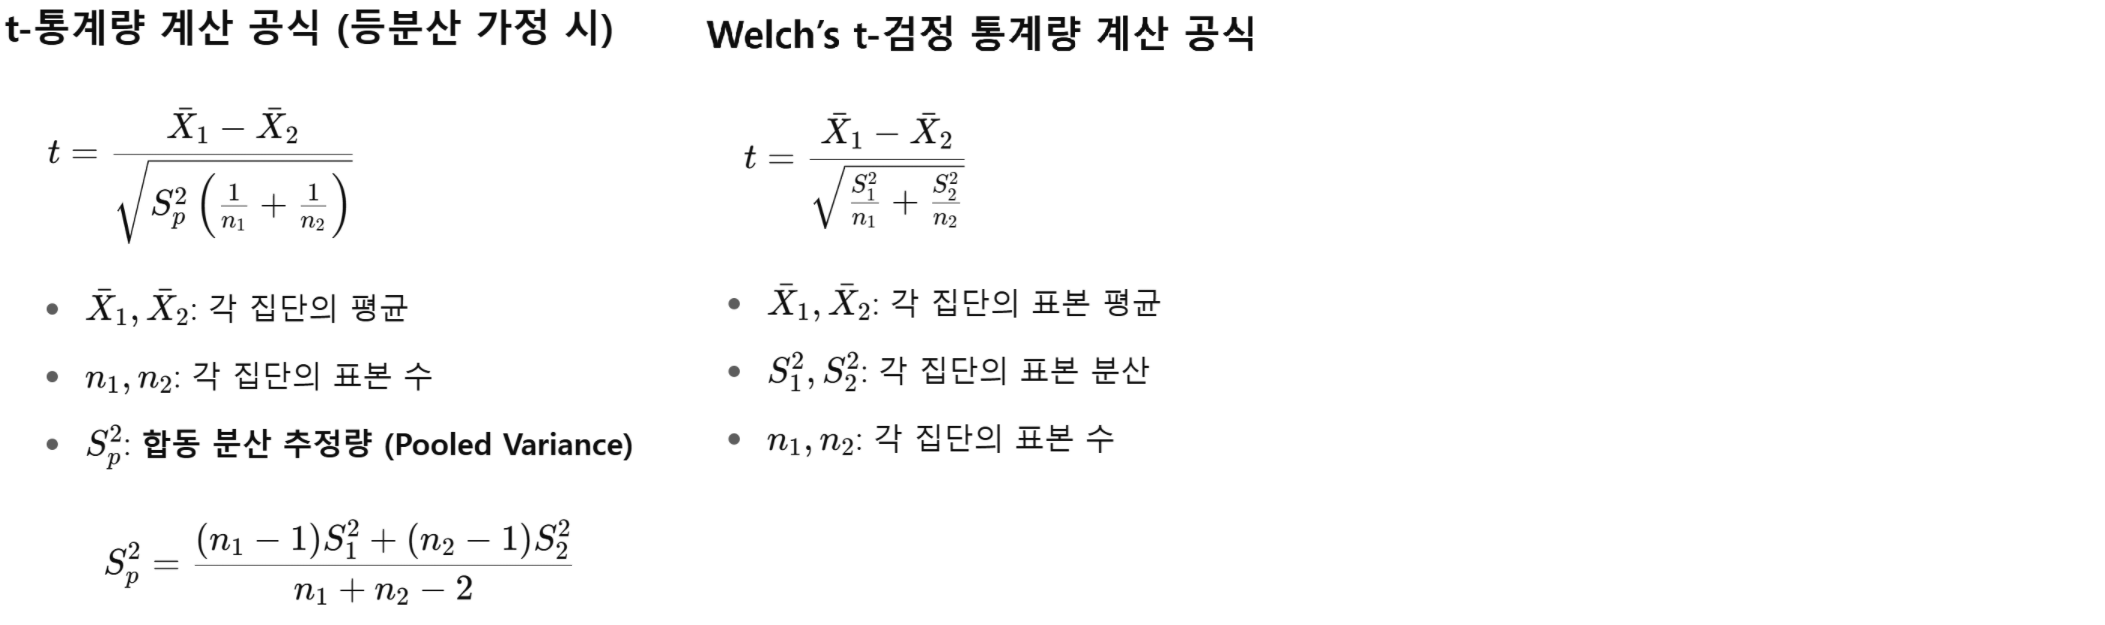

In [5]:
# 데이터 이해
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/gtsu070701/bigdata_license/refs/heads/main/3type_sample_bcc.csv')
print(df.shape)
print(df.head(3))

# 로그 변환
df['log_resistin'] = np.log(df['Resistin'])

# 그룹나누기
g1 = df.loc[df['Classification'] == 1, 'log_resistin']
g2 = df.loc[df['Classification'] == 2, 'log_resistin']

# 1. 두 집단의 로그 리지스틴 값의 분산에 차이가 있는지를 알아보기 위해 F-검정을 수행할 때, 검정통계량의 값을 구하시오.
# (단, 분자의 자유도가 분모의 자유도보다 크도록 하여라.)
# [제출 형식] 반올림하여 소수 셋째 자리까지 작성
g1_df, g2_df = len(g1) - 1, len(g2) - 1
g1_var, g2_var = g1.var(), g2.var()
#print(g1_df, g2_df) #51 63
#print('g1_var / g2_var' if g1_df > g2_df else 'g2_var / g1_var')
result = g2_var / g1_var
print(round(result, 3)) # 1.348

# 2. 합동 분산 추정량 (직접 계산 필요)
result = ((g1_df * g1_var) + (g2_df * g2_var)) / (g1_df + g2_df)
print(round(result, 3))  # 0.449

# 3. 2번 문제에서 구한 합동 분산 추정량을 이용하여,
# 두 집단의 로그 리지스틴 값에 유의미한 차이가 있는지 독립표본 t-검정을 수행하고 p-값을 구하시오.
from scipy.stats import ttest_ind
statistic, pvalue = ttest_ind(g1, g2, equal_var=True)
print(round(pvalue, 3)) # 0.003
print(round(statistic, 3))  # -3.029 - t통계량

(116, 2)
   Resistin  Classification
0   7.99585               1
1   4.06405               1
2   9.27715               1
1.348
0.449
0.003
-3.029


**ttest_ind(g1, g2, equal_var=True) 가 어떻게 동작되는가?**

In [ ]:
#ttest_ind(g1, g2, equal_var=True) 가 어떻게 동작되는가?
import numpy as np
import pandas as pd
path = 'https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/'
df = pd.read_csv(path + 'bcc.csv')

# 로그 변환
df['log_resistin'] = np.log(df['Resistin'])

# 그룹나누기
g1 = df.loc[df['Classification']==1, 'log_resistin']
g2 = df.loc[df['Classification']==2, 'log_resistin']

# ttest_ind를 사용하지 않고 직접 구하는 방법
n1, n2 = len(g1), len(g2)
g1_var, g2_var = g1.var(), g2.var()
pooled_var = ((n1 - 1)*g1_var + (n2 - 1)*g2_var) / (n1 + n2 - 2)

t_stat = (g1.mean() - g2.mean()) / np.sqrt(pooled_var * (1/n1 + 1/n2))
print(round(t_stat, 3))

# t 통계량을 사용해 p-value를 직접 구하는 방법
from scipy.stats import t

# 자유도
df = n1 + n2 - 2

# 양측 검정 p-value 계산
p_value = 2 * (1 - t.cdf(abs(t_stat), df))
print(f'p-value = {p_value:.3f}')

-3.029
p-value = 0.003


##**F분포의 특징**
- F분포는 정의상 0 이상인 값만 갖는다.
- 오른쪽 꼬리가 긴 비대칭 분포이다.
- 중심이 1 근처에 있는 경우가 많다.(자유도에 따라 다름)

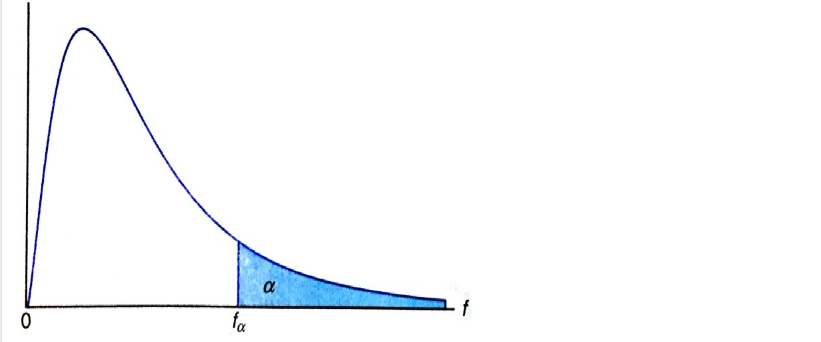

위의 그림에서, $f_\alpha$가 유의수준($\alpha$)에 대한 F검정 통계량이며, 색칠된 부분이 기각역을 나타낸다.
- 기각역이 오른쪽에 있다! (단측검정)

###**F검정 통계량의 정의**
- $F 통계량 = \frac{S_1^2}{S_2^2} \quad$
- $S_1^2$ : 분산이 더 큰 집단의 분산 (분자가 큼)
- $S_2^2$ : 분산이 더 작은 집단의 분산 (분모가 작음)
- 따라서 항상 F값이 1보다 크다.
- 즉, 오른쪽 꼬리가 기각역이 되어 "우측 단측검정"이 된다.
- F값이 클수록 대립가설을 지지하게 되고, 검정의 관심은 "F가 충분히 큰가?"이다.


###**1. 등분산성 검정에서의 F검정**
- 두 모집단의 분산이 같은지 검정하는 것이다.

- 귀무가설($H_0$) : $\sigma_1^2$ = $\sigma_2^2$
- 대립가설($H_1$) :
  - $\sigma_1^2$ $\ne$ $\sigma_2^2$  (양측 검정, 이론적 검정)
  - $\sigma_1^2$ $\gt$ $\sigma_2^2$  (단측 검정, 실제 검)
- 실제 : $F = \frac{S_1^2}{S_2^2} \quad (\text{단, } S_1^2 > S_2^2 \text{로 정렬하여 } F \ge 1)$
- F값이 "크면 클수록" 두 분산의 차이가 크다고 판단
- F 분포의 오른쪽 꼬리를 기준으로 판단하는 우측 단측 검정이다.

###**2. 회귀분석에서의 F검정**

- 귀무가설 $H_0$: 모든 회귀계수가 0이다 → 회귀 모형이 유의하지 않다.
- 대립가설 $H_1$: 적어도 하나는 0이 아니다. → 회귀 모형이 유의하다.
    - $H_0: \beta_1 = \beta_2 = \cdots = \beta_k = 0 $
    - $H_1: \text{적어도 하나의 } \beta_j \neq 0$

- $
F = \frac{\text{회귀 제곱합} / \text{회귀 자유도}}{\text{오차 제곱합} / \text{오차 자유도}} = \frac{MSR}{MSE}
$
  - $SSR$: 회귀 제곱합 (Sum of Squares for Regression)
  - $SSE$: 오차 제곱합 (Sum of Squares for Error)
  - $SST$: 총 제곱합 (Total Sum of Squares), 즉 $SST = SSR + SSE$
  - $MSR = SSR / k$: 회귀 평균 제곱 (mean square regression)
  - $MSE = SSE / (n - k - 1)$: 잔차 평균 제곱
  - $k$: 독립변수 개수
  - $n$: 관측값 개수
$

- F값이 클수록 대립가설을 지지한다. (기각된다.)
- 따라서 오른쪽 꼬리만 보는, 우측 단측 검정이다.

###**3. ANOVA에서의 F검정**
- 3개 이상 집단 간 평균이 동일한지 검정한다.
- 단순히 평균이 다른지 여부만 판단하며, 어떤 집단 간 차이인지는 알려주지 않는다.

- 귀무가설($H_0$): 모든 집단의 모평균이 같다
- 대립가설($H_1$) : 적어도 하나의 집단 평균이 다르다
    - $H_0 : \mu_1 = \mu_2 = \cdots = \mu_k$
    - $H_1 : \text{적어도 하나의 } \mu_i \text{ 가 다르다}$

- $F = \frac{\text{집단 간 제곱합} / \text{집단 간 자유도}}{\text{집단 내 제곱합} / \text{집단 내 자유도}} = \frac{MSB}{MSW}$

    - MSB = \frac{SSB}{k - 1}: 집단 간 평균 제곱 (Mean Square Between)
    - MSW = \frac{SSW}{n - k}: 집단 내 평균 제곱 (Mean Square Within)
    - SSB: 집단 간 제곱합 (Sum of Squares Between)
    - SSW: 집단 내 제곱합 (Sum of Squares Within)
    - k: 집단 수
    - n: 전체 표본 수

- F값이 클수록 → 집단 간 평균 차이가 크다고 판단한다.
- 유의수준 $\alpha$(예: 0.05)에 따라 F분포의 우측 꼬리에서 유의성 판단
- p-value <= $\alpha$ → 귀무가설 기각 → 평균 차이가 있다로 판단